In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import random

from sklearn import linear_model

## Basic

In [6]:
bds = pd.read_csv("./data/bds.csv")
bds = bds.dropna()
bds.shape, bds.columns

((506, 14),
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV'],
       dtype='object'))

In [7]:
## Train model 1 biến

nModel = linear_model.LinearRegression()
nModel.fit(bds[["RAD"]], bds["TAX"])

LinearRegression()

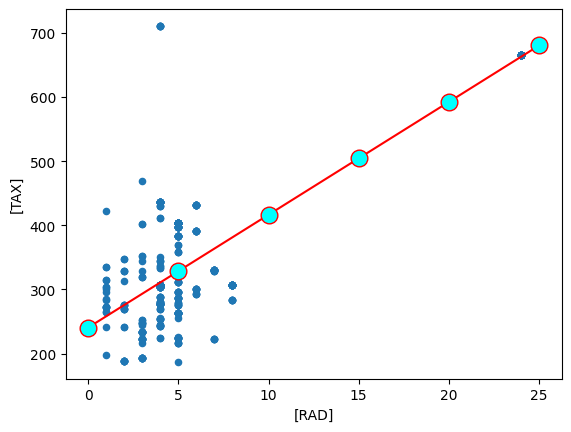

In [8]:
## Đối chiếu mô hình và Data

bds.plot.scatter(x=["RAD"],y=["TAX"])

nx = np.array([0,5,10,15,20,25])
ny = (nModel.coef_[0]) * nx   +  (nModel.intercept_)
## Y = aX + b

plt.plot(nx, ny ,color="red", marker='o',
     markerfacecolor='cyan', markersize=12)
plt.show()

In [9]:
## Đánh giá kết quả

nModel.score(bds[["RAD"]], bds["TAX"])

0.8297353279074212

In [10]:
## Predict cho Data, đánh giá lại

x = bds[["RAD"]][:3]
y = bds["TAX"][:3]

nModel.score(x, y)

-0.9102819564208886

## Train-Valid-Test 

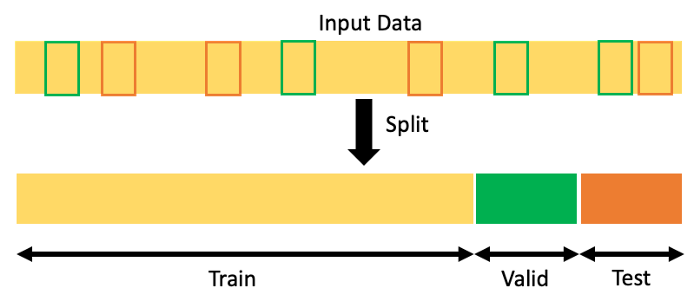


### Standard metrics
- Mean squared error (MSE)  
- Root mean squared error (RMSE)  
- Mean absolute error (MAE)   
...  

consists of:  
- Accuracy  
- Log-loss  
- F-measure ...  

In [18]:
# dataset
from sklearn import datasets
from sklearn.datasets import make_classification

# preProcessing
from sklearn.preprocessing import StandardScaler , PolynomialFeatures

# Model
from sklearn.linear_model import LinearRegression , Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import  SVR, SVC

# util - split / pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

# Metrics
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error




In [19]:
X = bds[["RAD"]]
y = bds["TAX"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X.shape , y.shape

((506, 1), (506,))

In [14]:
X_train.shape , y_train.shape

((339, 1), (339,))

In [15]:
X_test.shape , y_test.shape

((167, 1), (167,))

### Linear 

In [21]:
## Train Data

nModel = linear_model.LinearRegression()
nModel.fit( X_train , y_train )

LinearRegression()

In [22]:
# check  
nModel.score( X_train , y_train )

0.8118601996953414

In [23]:
# validate  
nModel.score( X_test , y_test )

0.8645882150738216

In [24]:
y_predict = nModel.predict(X_test)
mean_squared_error( y_test, y_predict )

3929.5499873724334

### SVM

https://scikit-learn.org/stable/modules/svm.html# 

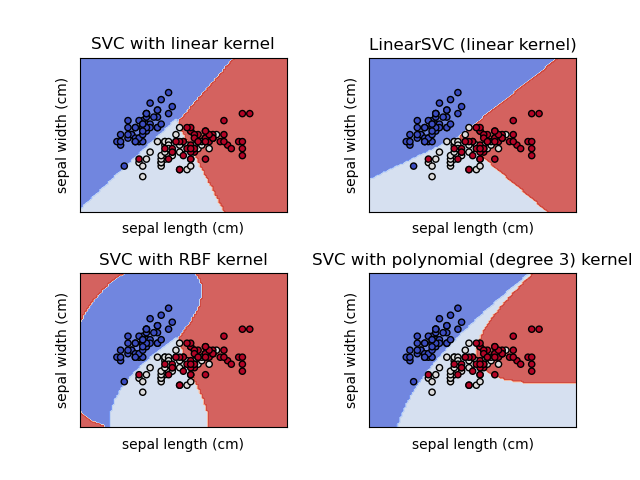

In [26]:
## Train Data
svmModel = SVR()
svmModel.fit( X_train , y_train )

SVR()

In [27]:
# check  
svmModel.score( X_train , y_train )


0.5319081994308039

In [28]:
y_predict = svmModel.predict(X_test)
mean_squared_error( y_test, y_predict )

12863.816007839883